<a href="https://colab.research.google.com/github/viktoruebelhart/studies/blob/main/Alura_Pytorch_F_Perda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print(device)

cpu


## Classificação de Vinho
datasets load wine

In [3]:
from sklearn import datasets
wine = datasets.load_wine()
data = wine.data
target = wine.target

In [4]:
print(data.shape)
print(target.shape)
print(wine.feature_names)
print(wine.target_names)

(178, 13)
(178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
['class_0' 'class_1' 'class_2']


In [5]:
len(wine.target_names)

3

In [6]:
data[0].dtype

dtype('float64')

In [7]:
data[1]

array([1.32e+01, 1.78e+00, 2.14e+00, 1.12e+01, 1.00e+02, 2.65e+00,
       2.76e+00, 2.60e-01, 1.28e+00, 4.38e+00, 1.05e+00, 3.40e+00,
       1.05e+03])

In [8]:
target[15]

0

## Instancias MLP

In [9]:
import torch.nn as nn

input_size  = data.shape[1]
hidden_size = 32
output_size = len(wine.target_names)

class Wineclass(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Wineclass, self).__init__()

        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu   = nn.ReLU()
        self.out    = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax()

    def forward(self, X):

        feature = self.relu(self.hidden(X))
        output  = self.softmax(self.out(feature))

        return output

In [10]:
net = Wineclass(input_size, hidden_size, output_size).to(device)

In [11]:
print(net)

Wineclass(
  (hidden): Linear(in_features=13, out_features=32, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=32, out_features=3, bias=True)
  (softmax): Softmax(dim=None)
)


## Classificação

Função de Perda

In [12]:
criterio = nn.CrossEntropyLoss().to(device)

In [13]:
Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).to(device)

print(Xtns.dtype, Ytns.dtype)

torch.float32 torch.int64


In [14]:
Xtns.shape

torch.Size([178, 13])

In [15]:
pred = net(Xtns)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [16]:
print(pred.shape, Ytns.shape)

torch.Size([178, 3]) torch.Size([178])


In [17]:
loss = criterio(pred, Ytns)
print(loss)

tensor(1.1526, grad_fn=<NllLossBackward0>)


## Regressão

Dataset de Diabetes

In [18]:
from sklearn import datasets

diabetes = datasets.load_diabetes()


In [19]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [20]:
data = diabetes.data
target = diabetes.target

print(data.shape)
print(target.shape)
print(diabetes.feature_names)

print(data[15])
print(target[15])

(442, 10)
(442,)
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[-0.05273755  0.05068012 -0.01806189  0.08040085  0.08924393  0.10766179
 -0.03971921  0.1081111   0.03606033 -0.04249877]
171.0


## MLP

In [21]:
import torch.nn as nn

input_size  = data.shape[1]
hidden_size = 32
output_size = 1   # Progressão diabetes ( 1 numero )

class ProgressDiabetes(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ProgressDiabetes, self).__init__()

        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu   = nn.ReLU()
        self.out    = nn.Linear(hidden_size, output_size)
        self.softmax= nn.Softmax(dim=1)

    def forward(self, X):

        feature = self.relu(self.hidden(X))
        output  = self.softmax(self.out(feature))

        return output

In [22]:
net = ProgressDiabetes(input_size, hidden_size, output_size).to(device)

In [23]:
criterio = nn.MSELoss().to(device)

Xtns = torch.from_numpy(data).float().to(device)
Ytns = torch.from_numpy(target).float().to(device)

print(Xtns.shape, Ytns.shape)

torch.Size([442, 10]) torch.Size([442])


In [24]:
pred = net(Xtns)

print(pred.shape)

torch.Size([442, 1])


In [25]:
loss = criterio(pred.squeeze(), Ytns)
print(loss)

tensor(28771.2148, grad_fn=<MseLossBackward0>)


## Otimização dataset Wine

In [35]:
from sklearn import datasets

wine = datasets.load_wine()

In [36]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [42]:
print(wine.data.shape)

(178, 13)


In [37]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [52]:
#selecionar no data apenas 'alcohol' e  'color_intensity',

import torch
from torch import nn
from sklearn import datasets
import torch.nn as nn
from sklearn import datasets

# Selecting 'alcohol' and 'color_intensity'
alcohol_index = wine.feature_names.index('alcohol')
color_intensity_index = wine.feature_names.index('color_intensity')

data = wine.data[:, [alcohol_index, color_intensity_index]]
target = wine.target

print(data.shape)
print(data[:5]) # Print the first 5 samples
print(target[:5])

(178, 2)
[[14.23  5.64]
 [13.2   4.38]
 [13.16  5.68]
 [14.37  7.8 ]
 [13.24  4.32]]
[0 0 0 0 0]


Text(0.5, 1.0, 'Wine Dataset Visualization')

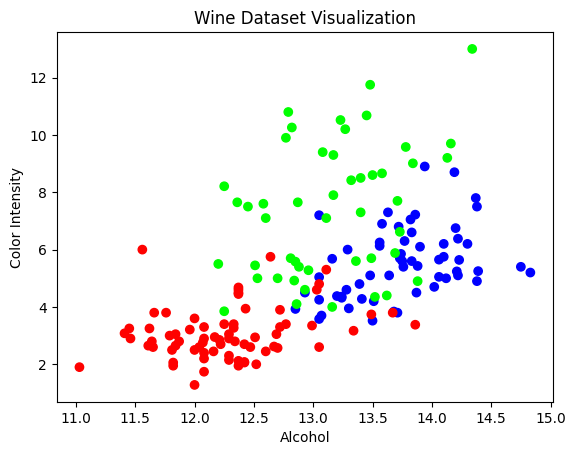

In [54]:
import matplotlib.pyplot as plt

plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.brg)
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Wine Dataset Visualization')

## Normalização dos Dados

Text(0.5, 1.0, 'Wine Dataset Visualization')

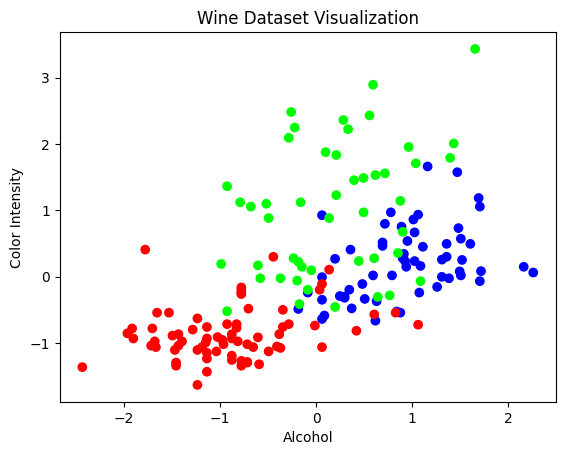

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.scatter(data[:, 0], data[:, 1], c=target, cmap=plt.cm.brg)
plt.xlabel('Alcohol')
plt.ylabel('Color Intensity')
plt.title('Wine Dataset Visualization')